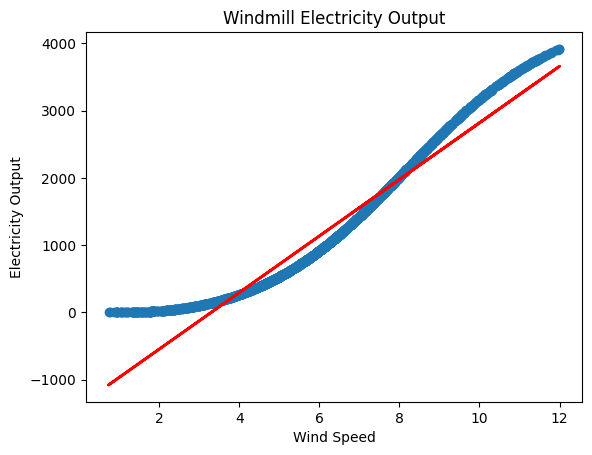

In [ ]:
#Other URL to test if needed: 

# to be used in # forecast new data parts + need to place the PVurl in pV part and Windurl in Wind part

OTTWD = 'https://raw.githubusercontent.com/MaxPrt/GWanalytics/main/OTTPV.csv'
OTTPV = 'https://raw.githubusercontent.com/MaxPrt/GWanalytics/main/OTTWIND.csv'

TORWD = 'https://raw.githubusercontent.com/MaxPrt/GWanalytics/main/TORPV.csv'
TORPV = 'https://raw.githubusercontent.com/MaxPrt/GWanalytics/main/TORWIND.csv'



# It is better to run every block in order 
#lib needed 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# import required CSV from RenewablesNinja (file located on Github repository)

url = 'https://raw.githubusercontent.com/MaxPrt/GWanalytics/main/trainingsetwind.csv'
df = pd.read_csv(url, skiprows=3, decimal='.')
df['electricity'] = df['electricity'].astype(float)
df['wind_speed'] = df['wind_speed'].astype(float)

# fitler values for windspeed (we only make the regression for 0 to 12)

df = df[df['wind_speed'] < 12]

# define the Regression model 

X = df[['wind_speed']]
y = df['electricity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Show the results graphically

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Windmill Electricity Output')
plt.xlabel('Wind Speed')
plt.ylabel('Electricity Output')
plt.show()

      forecast Windmill
0            813.965723
1            813.965723
2            637.314561
3            563.709911
4            526.697286
...                 ...
8755        1203.018875
8756        1330.880668
8757        1342.236814
8758        1138.667381
8759         968.745788

[8760 rows x 1 columns]


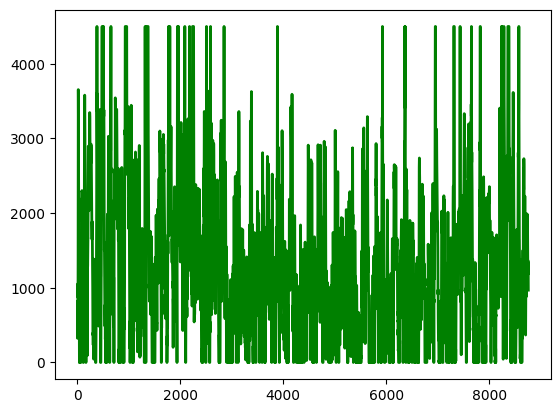

In [ ]:
# forecast new data using the model previsouly created

# other url = TORWD OTTWD (Toronto and Ottawa)

# Load new CSV file that we want to forecast
url = 'https://raw.githubusercontent.com/MaxPrt/GWanalytics/main/WINDSBpre.csv'
ActLoc = pd.read_csv(url, skiprows=3, decimal='.')

errortestingset = ActLoc['electricity']

# Convert wind speed to float and filter out rows with wind speed >= 12
ActLoc['wind_speed'] = ActLoc['wind_speed'].astype(float)
ActLoc_12 = ActLoc[ActLoc['wind_speed'] < 12]

# Predict electricity output with linear regression 
reg = LinearRegression()
reg.fit(X_train, y_train)
ActLoc['electricity_pred'] = reg.predict(ActLoc[['wind_speed']])

# Apply additional rules for electricity output
ActLoc['electricity_pred'] = np.where(ActLoc['wind_speed'].between(12, 20), 4500, ActLoc['electricity_pred'])
ActLoc['electricity_pred'] = np.where(ActLoc['wind_speed'] > 20, 0, ActLoc['electricity_pred'])
ActLoc['electricity_pred'] = np.where(ActLoc['electricity_pred'] < 0, 0, ActLoc['electricity_pred'])


# new DataFrame with the predicted electricity output
forecast = pd.DataFrame({'forecast Windmill': ActLoc['electricity_pred']})

print (forecast)
plt.plot(forecast, color='green', linewidth=2)

MAE: 162.11666190307304
RMSE: 188.80884596052795
MAPE: 26.161459238471295


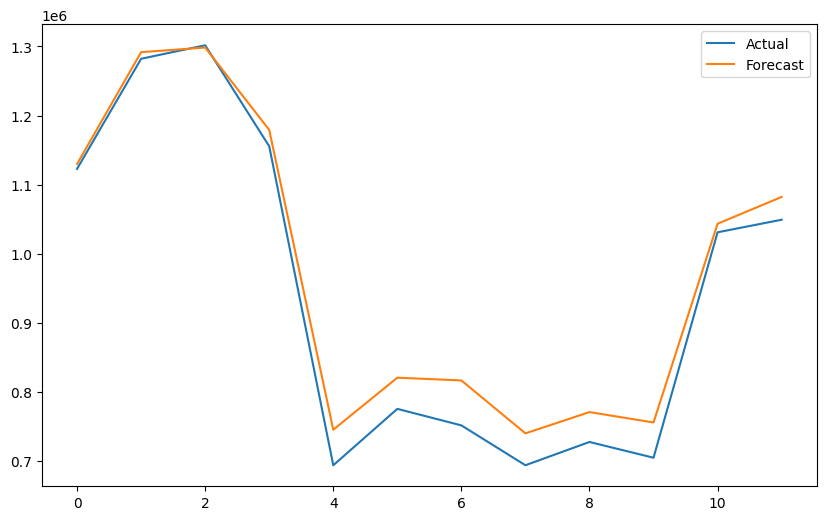

In [ ]:
# Comparing the forecasted and actual data for WindTurbine

# Group the DataFrame into 730 rows parts and sum them to get the prod per month (8760/12 = 730)
ACTWM = pd.DataFrame({'forecast Windmill': ActLoc['electricity'].groupby(ActLoc['electricity'].index // 730).sum()})
PREDWM = forecast.groupby(forecast.index // 730).sum()

# calculation for MAE RMSE MAPE 
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(errortestingset, forecast['forecast Windmill'])
mse = mean_squared_error(errortestingset, forecast['forecast Windmill'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((errortestingset - forecast['forecast Windmill']) / errortestingset)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

plt.figure(figsize=(10, 6))
plt.plot(ACTWM, label='Actual')  
plt.plot(PREDWM, label='Forecast')  
plt.legend() 

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(ACTWM, PREDWM)
mse = mean_squared_error(ACTWM, PREDWM)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((ACTWM - PREDWM) / ACTWM)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 32601.838694212416
RMSE: 38184.252788842656
MAPE: forecast Windmill    4.149525
dtype: float64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


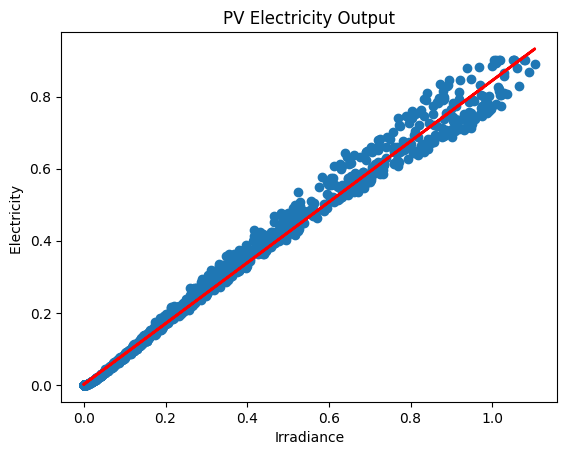

In [ ]:
# Same method for PV But no filter needed 

url = 'https://raw.githubusercontent.com/MaxPrt/GWanalytics/main/trainingsetPV.csv'
df = pd.read_csv(url, skiprows=3, decimal='.')

df['electricity'] = df['electricity'].astype(float)
df['irradiance_diffuse'] = df['irradiance_diffuse'].astype(float)
df['irradiance_direct'] = df['irradiance_direct'].astype(float)

# calculate the total irradiance from the direct and diffuse components
df['irradiance'] = df['irradiance_direct'] + df['irradiance_diffuse']

# fit a linear regression model 
X = df[['irradiance']]
y = df['electricity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('PV Electricity Output')
plt.xlabel('Irradiance')
plt.ylabel('Electricity ')
plt.show()

      forecast PV
0        0.001638
1        0.001638
2        0.001638
3        0.001638
4        0.001638
...           ...
8755     0.060632
8756     0.015965
8757     0.001638
8758     0.001638
8759     0.001638

[8760 rows x 1 columns]


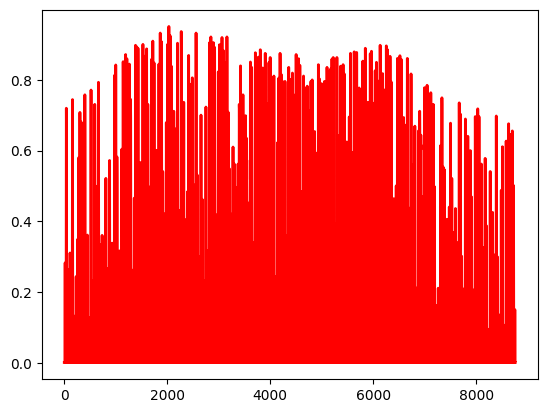

In [ ]:
# forecast new data for PV

# other url = TORPV or OTTPV (Toronto and Ottawa)

# Load new data from CSV file
url = 'https://raw.githubusercontent.com/MaxPrt/GWanalytics/main/PVBPpre.csv'
new_data2 = pd.read_csv(url, skiprows=3, decimal='.')
testforPV = pd.DataFrame(new_data2['electricity'])

new_data2['irradiance_diffuse'] = df['irradiance_diffuse'].astype(float)
new_data2['irradiance_direct'] = df['irradiance_direct'].astype(float)

new_data2['irradiance'] = new_data2['irradiance_direct'] + new_data2['irradiance_diffuse']

# Predict electricity output using linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
new_data2['electricity_pred'] = reg.predict(new_data2[['irradiance']])

# Create a new DataFrame with the predicted electricity output
forecast2 = pd.DataFrame({'forecast PV': new_data2['electricity_pred']})
print (forecast2)
plt.plot(forecast2, color='red', linewidth=2)


MAE: 0.04444761446891533
RMSE: 0.09460444300420044
AGG MAPE: 8.701731980858147


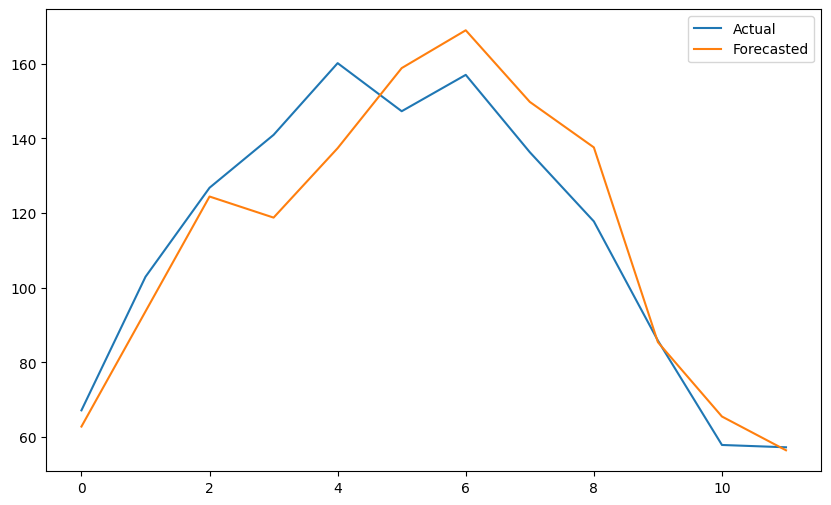

In [ ]:
# Group the DataFrame into 730 rows parts and sum them to get the prod per month (8760/12 = 730)
ACTPV = testforPV['electricity'].groupby(testforPV['electricity'].index // 730).sum()
PREPV = forecast2['forecast PV'].groupby(forecast2['forecast PV'].index // 730).sum()

mae = mean_absolute_error(testforPV['electricity'], forecast2['forecast PV'])
mse = mean_squared_error(testforPV['electricity'], forecast2['forecast PV'])
rmse = np.sqrt(mse)

mape = np.mean(np.abs((ACTPV - PREPV) / ACTPV)) * 100


plt.figure(figsize=(10, 6))
plt.plot(ACTPV, label='Actual') 
plt.plot(PREPV, label='Forecasted')  
plt.legend()  

# MAE and RMSE for non agregated data 

print("MAE:", mae)
print("RMSE:", rmse)

# MAPE for comparision per month 

print("AGG MAPE:", mape)

plt.show()

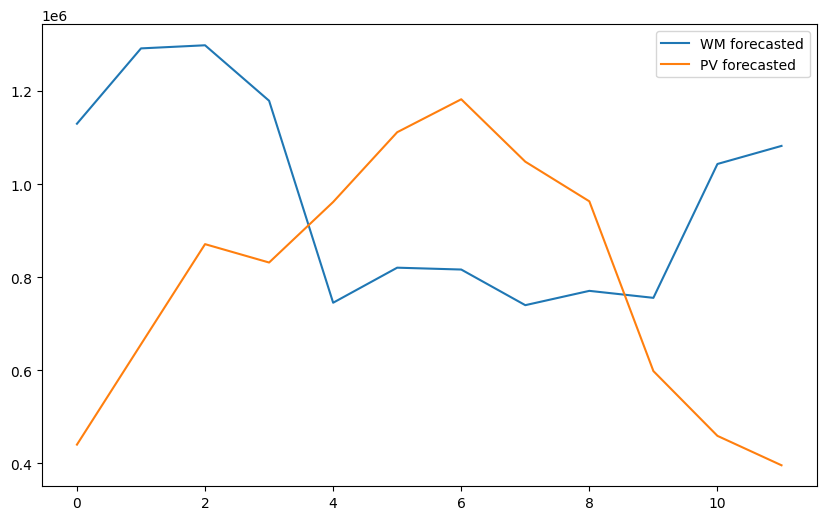

In [ ]:
# show complementarity of PV and Windturbines per month with similar level of investment 

plt.figure(figsize=(10, 6))
plt.plot(PREDWM, label='WM forecasted') 
plt.plot(PREPV*7000, label='PV forecasted')  
plt.legend()  

plt.show()

In [ ]:
import numpy as np
from scipy.optimize import dual_annealing

Inv_PV = 650
Inv_WM = 7000000



# define the objective function that we aim to minimize
def objective(x):
    num_wind_turbines = x[0]
    num_solar_panels = x[1]
    total_production = num_wind_turbines * forecast['forecast Windmill'] + num_solar_panels * forecast2['forecast PV']
    total_cost = num_wind_turbines * Inv_WM + num_solar_panels * Inv_PV
    cost_penalty = 1e20 if np.median(total_production) < 10000 else 0
    return total_cost + cost_penalty

# define the bounds for optimization variables
bounds = [(0, 500), (0, 100000)]

# run the dual annealing optimization algorithm
result = dual_annealing(objective, bounds, maxiter=1000, seed=8)

# print results
print("Optimal number of wind turbines: ", result.x[0])
print("Optimal number of solar panels: ", result.x[1])
print("total cost CAD:",result.x[0]*Inv_WM+result.x[1]*Inv_PV)

target_cost=result.x[0]*Inv_WM+result.x[1]*Inv_PV
wx2 = result.x[1]
wx1 = result.x[0]

Optimal number of wind turbines:  6.570422393033258
Optimal number of solar panels:  18303.462659261502
total cost CAD: 57890207.47975279


In [ ]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils
from pyomo.environ import *

PRODPV = forecast2['forecast PV']
PRODWM = forecast['forecast Windmill']


# Define the model
model = ConcreteModel()

# Define the decision variables
model.num_WM = Var(within=NonNegativeReals)
model.num_PV = Var(within=NonNegativeReals)

# Define the objective function
model.obj = Objective(expr=sum((PRODWM * model.num_WM) + (PRODPV * model.num_PV)), sense=maximize)

# Define the cost constraint

model.constraint1 = Constraint(expr=model.num_WM*Inv_WM+ model.num_PV*Inv_PV <= target_cost)

# Solve the model
opt = SolverFactory('glpk')
opt.solve(model)

# Print results
print(f"Optimized number of windmills: {model.num_WM()}")
print(f"Optimized number of solar panels: {model.num_PV()}")

wy1 = model.num_WM()
wy2 = model.num_PV()


Optimized number of windmills: 0.0
Optimized number of solar panels: 89061.8576611581


In [ ]:
# This optimization is very similar, it is only interesting to consider when Windturbines have a better ratio of investment to kwh output since the algorithm will by windturbines until it has not enough funds and then will purchase PVs

# Define the model
model = ConcreteModel()

# Define the decision variables
model.num_WM = Var(within=NonNegativeIntegers)
model.num_PV = Var(within=NonNegativeIntegers)

# Define the objective function
model.obj = Objective(expr=sum(PRODWM * model.num_WM) + sum(PRODPV * model.num_PV), sense=maximize)

# Define the cost constraint

model.constraint1 = Constraint(expr=model.num_WM*Inv_WM+ model.num_PV*Inv_PV <= target_cost)

# Solve the model
opt = SolverFactory('glpk')
opt.solve(model)

# Print the optimized results
print(f"Optimized number of windmills: {model.num_WM()}")
print(f"Optimized number of solar panels: {model.num_PV()}")

wz1 = model.num_WM()
wz2 = model.num_PV()

Optimized number of windmills: 0.0
Optimized number of solar panels: 89061.0


In [ ]:
# this is a simple calculation to have the information on which production mean has the best ratio of inv to output
'
Ratio1=Inv_PV/sum(PRODPV)
Ratio2=Inv_WM/sum(PRODWM)

print (Ratio1,Ratio2)'

0.4780813071476655 0.599711867720459


In [ ]:
# Comparing the different means and investment needed per kwh produced 

#different weights and investment 

X2 = wx1
X1 = wx2
INV1 = X2*Inv_WM + X1*Inv_PV

Y2 = wy1
Y1 = wy2
INV2 = Y2*Inv_WM + Y1*Inv_PV

Z2 = wz1
Z1 = wz2
INV3 = Z2*Inv_WM + Z1*Inv_PV

# different types of analysis 

#for median
MED1=np.median(PRODPV*X1 + PRODWM*X2)
MED2=np.median(PRODPV*Y1 + PRODWM*Y2)
MED3=np.median(PRODPV*Z1 + PRODWM*Z2)

#for sd
SD1=np.std(PRODPV*X1 + PRODWM*X2)
SD2=np.std(PRODPV*Y1 + PRODWM*Y2)
SD3=np.std(PRODPV*Z1 + PRODWM*Z2)

#for avg
AVG1=(PRODPV*X1 + PRODWM*X2).mean()
AVG2=(PRODPV*Y1 + PRODWM*Y2).mean()
AVG3=(PRODPV*Z1 + PRODWM*Z2).mean()

#for investment / kwh

COST1=INV1/sum(PRODPV*X1 + PRODWM*X2)
COST2=INV2/sum(PRODPV*Y1 + PRODWM*Y2)
COST3=INV3/sum(PRODPV*Z1 + PRODWM*Z2)

print(sum(PRODPV*X1 + PRODWM*X2))
print(sum(PRODPV*Y1 + PRODWM*Y2))
print(sum(PRODPV*Z1 + PRODWM*Z2))


recap = {' ': ['median', 'sd', 'avg','total invest','invest/kwh'],
        'OPTMED': [MED1, SD1,AVG1, INV1,COST1],
        'OPTPROD1': [MED2, SD2,AVG2, INV2,COST2],
        'OPTPROD2': [MED3, SD3,AVG3, INV3,COST3]}

table = pd.DataFrame(recap)

columns_to_format = ['OPTMED', 'OPTPROD1', 'OPTPROD2']

# Apply the format to specific columns
table[columns_to_format] = table[columns_to_format].applymap("{:.2f}".format)

table

101577169.77073008
121088623.6593193
121087457.58203699


,,OPTMED,OPTPROD1,OPTPROD2
0,median,10000.00,596.25,596.24
1,sd,7901.85,21174.73,21174.53
2,avg,11595.57,13822.90,13822.77
3,total invest,57890207.48,57890207.48,57889650.00
4,invest/kwh,0.57,0.48,0.48
